In [19]:
import sys
sys.path.insert(0, '/Volumes/Work/Code/GlyCompare/')
import os
from importlib import reload
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore


# reload(pipeline_functions)

from glycompare import *
import matplotlib.pyplot as plt
from copy import deepcopy
# reload(pipeline_functions)
%matplotlib inline

In [2]:
from glycompare import *
import glycompare.glycan_io

# Generate candidate glycan

In [10]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Volumes/Work/Code/GlyCompare/'
glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = False
num_processors = 8
# project parameter
working_addr = '/Volumes/Work/Code/GlyCompare/example_data/paper_epo/'
project_name = "paper_epo"
costumized_glycan_identifier = True
external_profile_naming= True
reload(pipeline_functions)

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, glytoucan_db_addr=glytoucan_db_addr)
keywords_dict

{'project_name': 'paper_epo',
 'working_addr': '/Volumes/Work/Code/GlyCompare/example_data/paper_epo/',
 'glycoct_dir': '/Volumes/Work/Code/GlyCompare/example_data/paper_epo/glycoct/',
 'source_dir': '/Volumes/Work/Code/GlyCompare/example_data/paper_epo/source_data/',
 'output_data_dir': '/Volumes/Work/Code/GlyCompare/example_data/paper_epo/output_data/',
 'plot_output_dir': '/Volumes/Work/Code/GlyCompare/example_data/paper_epo/output_plot/',
 'glycan_glycoct_dict_addr': '/Volumes/Work/Code/GlyCompare/example_data/paper_epo/output_data/paper_epo_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Volumes/Work/Code/GlyCompare/example_data/paper_epo/output_data/paper_epo_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Volumes/Work/Code/GlyCompare/example_data/paper_epo/output_data/paper_epo_substructure_glycoct_dict.json',
 'substructure_glycoct_vec_addr': '/Volumes/Work/Code/GlyCompare/example_data/paper_epo/output_data/paper_epo_substruct

In [15]:
from glypy.algorithms.subtree_search.inclusion import subtree_of

feature_name = ['G79412GP', 'G86696LV', 'G17689DH', '3055.1', 'G49721VX', 'G80393PG', '2401.1', '2693.2', 'G80264ZA', '3416.1', 'G76812VG', 'G07483YN', 'G07568IR', 'G79457WN', '3865.1', 'G75308SV', 'G80858MF', 'G54953LX', 'G00176HZ', 'G09280JF', 'G39439UR', 'G54338PJ', 'G60415BS', 'G04483SK', 'G10691MJ', 'G58667NI', '4675.1', 'G88966ZO', '4587.1', '5312.1', 'G90130AG', '3457.1', '4041.1', '5486.1', 'G40242TG', 'G20924UR', 'G30460NZ', 'G37597FW', 'G39813YP', 'G05098FE', '2605.1', 'G23295TF', '3592.1', '3416.2', 'G99891PR', 'G12398HZ', 'G56516KW', '2967.1', 'G39764AC', 'G05203UQ', 'G85809SI', '3416.3', '1754.1', 'G49604DB', 'G88127MB']
glycan_dict_1 =glycan_io.load_glycan_obj_from_glycoct_file(keywords_dict['glycoct_dir'])
print(sorted(list(glycan_dict_1.keys())))
glycan_dict = glycan_io.load_glycan_dict_from_json(keywords_dict['glycan_glycoct_dict_addr'])
# glycan_dict_1 = glycan_io.load_glycan_dict_from_json('../example_data/paper_epo_2/output_data/paper_epo_glycan_glycoct_dict.json')
new_glycan_dict = {}
missing_list = []
for i in feature_name:
    print('testing', i)
    _found = False
    for j in glycan_dict_1:
        if subtree_of(glycan_dict[i], glycan_dict_1[j], exact=False)==1 and \
            subtree_of( glycan_dict_1[j], glycan_dict[i], exact=False)==1:
            print(i, 'matching', j)
            new_glycan_dict[j]=glycan_dict_1[j]
            _found =True
    if not _found:
        print('missing', i)
        missing_list.append(i)
        

['1375.1', '1417.1', '1580.1', '1591.1', '1662.1', '1754.1', '1795.1', '1836.1', '2040.1', '2040.2', '2070.1', '2081.1', '2081.2', '2156.1', '2244.1', '2244.2', '2244.3', '2285.1', '2326.1', '2401.1', '2401.2', '2489.1', '2530.1', '2605.1', '2605.2', '2605.3', '2605.4', '2605.5', '2646.1', '2693.1', '2693.2', '2693.3', '2693.4', '2693.5', '2734.1', '2792.1', '2892.1', '2939.1', '2967.1', '2967.2', '2967.3', '3055.1', '3055.2', '3055.3', '3055.4', '3096.1', '3143.1', '3143.2', '3212.1', '3242.2', '3388.1', '3416.1', '3416.2', '3416.3', '3416.4', '3416.5', '3457.1', '3504.1', '3504.2', '3504.3', '3592.1', '3592.2', '3605.1', '3661.1', '3777.1', '3777.2', '3865.1', '3865.2', '3865.3', '3953.1', '4022.1', '4041.1', '4041.2', '4052.1', '4226.1', '4226.2', '4226.3', '4314.1', '4402.1', '4413.1', '4490.1', '4587.1', '4675.1', '4675.2', '4675.3', '4763.1', '4851.1', '4862.1', '5037.1', '5037.2', '5312.1', '5486.1', '5486.2']
testing G79412GP
G79412GP matching 2892.1
testing G86696LV
G86696LV m

In [16]:
glycan_io.output_glycan_dict_to_glycoct_dict(new_glycan_dict, '../example_data/merging_network/new_glycan_dict.json')

In [20]:
from glycompare import glycoct2linear
reload(glycoct2linear)

from glypy.io import glycoct
# new_glycan_dict = glycan_io.load_glycan_dict_from_json('../example_data/merging_network/new_glycan_dict.json')
string_list = {}

for i in new_glycan_dict:
#     print(new_glycan_dict[i])
    string_list[i]=glycoct2linear.glycoct2linear(new_glycan_dict[i])
json_utility.store_json('../example_data/merging_network/vec_linear.json',string_list)

# convert glycan to glycoct

In [21]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Volumes/Work/Code/GlyCompare/'
linkage_specific = True
num_processors = 8
# project parameter
working_addr = '/Volumes/Work/Code/GlyCompare/example_data/merging_network/'
project_name = "mapping"
reload(pipeline_functions)

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, )
keywords_dict

{'project_name': 'mapping',
 'working_addr': '/Volumes/Work/Code/GlyCompare/example_data/merging_network/',
 'glycoct_dir': '/Volumes/Work/Code/GlyCompare/example_data/merging_network/glycoct/',
 'source_dir': '/Volumes/Work/Code/GlyCompare/example_data/merging_network/source_data/',
 'output_data_dir': '/Volumes/Work/Code/GlyCompare/example_data/merging_network/output_data/',
 'plot_output_dir': '/Volumes/Work/Code/GlyCompare/example_data/merging_network/output_plot/',
 'glycan_glycoct_dict_addr': '/Volumes/Work/Code/GlyCompare/example_data/merging_network/output_data/mapping_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Volumes/Work/Code/GlyCompare/example_data/merging_network/output_data/mapping_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Volumes/Work/Code/GlyCompare/example_data/merging_network/output_data/mapping_substructure_glycoct_dict.json',
 'substructure_glycoct_vec_addr': '/Volumes/Work/Code/GlyCompare/example_data/m

In [22]:
pipeline_functions.check_init_dir(keywords_dict)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


In [23]:
glycan_substructure_glycoct_dict_addr = keywords_dict['glycan_substructure_glycoct_dict_addr']
glycan_substructure_dic = extract_substructures.extract_substructures_pip(glycan_dict=new_glycan_dict,
                                                                          gly_len=23,
                                                                          output_file=glycan_substructure_glycoct_dict_addr,
                                                                          num_processors=num_processors)

start parallel parsing 68 glycans
start 2892.1
start 3055.4
start 2967.3
start 2967.2
start 4226.3
start 4226.2
start 3055.3
start 1580.1
1580.1 7 0.1097569465637207
start 2081.1
2081.1 9 0.26117515563964844
start 2081.2
2081.2 9 0.5228641033172607
start 2401.1
2401.1 10 0.45810985565185547
start 2693.2
2892.1 12 1.7801101207733154
start 4022.1
2967.2 12 1.6281919479370117
start 3416.1
2967.3 12 1.65385103225708
start 3777.1
3055.4 13 2.5693938732147217
start 3777.2
3055.3 13 2.7674429416656494
start 1591.1
1591.1 7 0.16528606414794922
start 2693.4
2693.2 12 1.3127822875976562
start 2693.5
2693.5 12 1.8522920608520508
start 2530.1
2693.4 12 2.22576904296875
start 3865.1
3416.1 14 4.282744884490967
start 3865.2
2530.1 11 1.2319889068603516
start 3592.2
3777.1 15 8.252012014389038
start 1836.1
1836.1 8 0.14873600006103516
start 2326.1
2326.1 10 0.932344913482666
start 4675.1
3777.2 15 8.703793048858643
start 4675.2
4022.1 16 13.193739175796509
start 2156.1
2156.1 9 0.23632311820983887
st

In [24]:
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']

merge_substructure_dict = merge_substructure_vec.merge_substructure_dict_pip(
                    glycan_substructure_dict=glycan_substructure_dic,
                    glycan_dict=new_glycan_dict,
                    linkage_specific=True,
                    num_processors=8,
                    output_merged_substructure_glycoct_dict_addr=substructure_glycoct_dict_addr)

Start merge_glycan_substructure_to_substructure_dict
combine original
substructure_dict is merged with len  32795
finished removing duplicate
after the cleaning the substructure vec's length is 5285
1 6
2 20
3 31
4 52
5 83
6 128
7 191
8 274
9 374
10 472
11 549
12 590
13 592
14 552
15 473
16 368
17 255
18 153
19 78
20 32
21 10
22 2
5285


the glycan core is
start substructure_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
len 19
len 20
len 21
len 22
Finish the n-glycan match  2268  substructures are matched to the n-glycan core


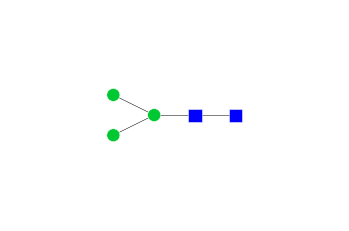

In [25]:
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']

substructure_dict = glycan_io.load_substructure_vec_from_json(substructure_glycoct_dict_addr)
core = select_motifs.nglycan_core
_substructure_lab = select_motifs.substructureLabwithCore(substructure_=substructure_dict,
                                                    glycan_core=core,
                                                    linkage_specific=linkage_specific)

In [27]:
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']

substructure_linear_dict = {}
for idex, i in enumerate([_substructure_lab.substructure_vec[i] for i in _substructure_lab.substructure_with_core_list]):
    substructure_linear_dict[idex] = glycoct2linear.glycoct2linear(i)

In [29]:
json_utility.store_json(keywords_dict['working_addr']+'substructure_linear.json', substructure_linear_dict)
#                         json_utility.store_json('../example_data/merging_network/vec_linear.json',string_list)

# loading intermediate network

In [30]:
edge_list=pd.read_csv(keywords_dict['source_dir']+'epo_network.csv')
edge_list[edge_list.enzyme=='MANII']

source  \
47              GNb2Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN;Asn[mg]   
55         GNb2Ma3(Ma3(Ma6)Ma6)Mb4GNb4(Fa6)GN;Asn[mg]   
59        GNb2(GNb4)Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN;Asn[mg]   
67                   GNb2Ma3(Ma6Ma6)Mb4GNb4GN;Asn[mg]   
84   GNb2(GNb4)Ma3(Ma3(Ma6)Ma6)Mb4GNb4(Fa6)GN;Asn[mg]   
86             GNb2(GNb4)Ma3(Ma6Ma6)Mb4GNb4GN;Asn[mg]   
100             GNb2Ma3(Ma6Ma6)Mb4GNb4(Fa6)GN;Asn[mg]   
143       GNb2(GNb4)Ma3(Ma6Ma6)Mb4GNb4(Fa6)GN;Asn[mg]   

                                          target enzyme  
47              GNb2Ma3(Ma6Ma6)Mb4GNb4GN;Asn[mg]  MANII  
55         GNb2Ma3(Ma6Ma6)Mb4GNb4(Fa6)GN;Asn[mg]  MANII  
59        GNb2(GNb4)Ma3(Ma6Ma6)Mb4GNb4GN;Asn[mg]  MANII  
67                 GNb2Ma3(Ma6)Mb4GNb4GN;Asn[mg]  MANII  
84   GNb2(GNb4)Ma3(Ma6Ma6)Mb4GNb4(Fa6)GN;Asn[mg]  MANII  
86           GNb2(GNb4)Ma3(Ma6)Mb4GNb4GN;Asn[mg]  MANII  
100           GNb2Ma3(Ma6)Mb4GNb4(Fa6)GN;Asn[mg]  MANII  
143     GNb2(GNb4)Ma3(Ma6)Mb4GNb4(Fa6)GN;Asn[mg]  MANII

In [33]:
glycan_dict = json_utility.load_json(keywords_dict['working_addr']+'vec_linear.json')
epo_glycans = [glycan_dict[i] for i in sorted(glycan_dict.keys())]
epo_glycans = [glycan+'[tg]' for glycan in epo_glycans]

In [34]:
print(len(set(epo_glycans) - set(list(edge_list['source']) + list(edge_list['target']))))
set(epo_glycans) - set(list(edge_list['source']) + list(edge_list['target']))

4


{'Ab1-GNb1-Ab1-GNb1-mb1-(Ab1-GNb1-Ab1-GNb1-Ab1-GNb1-Ma6)mb1-GNb1-(Fa6)GN;Asn[tg]',
 'Ab1-GNb1-Ab1-GNb1-mb1-(Ab1-GNb1-mb1-)mb1-GNb1-(Fa6)GN;Asn[tg]',
 'Ma3(Ma3(Ma6)Ma6)Mb4GNb4(Fa6)GN;Asn[tg]',
 'Ma3(Ma6Ma6)Mb4GNb4GN;Asn[tg]'}

# modify edge rules

In [35]:
sourse_list = [i[:-8] for i in edge_list.source]
target_list = [i[:-8] for i in edge_list.target]
sourse_list.extend(['Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN','Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN', 'Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN'])
enzyme_list = list(edge_list.enzyme)
enzyme_list.extend(['MANII', 'A6FUCT', 'MANII'])
target_list.extend(['Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN', 'Ma3(Ma3(Ma6)Ma6)Mb4GNb4(Fa6)GN','Ma3(Ma6Ma6)Mb4GNb4GN'])


# for j in edge_list.target:
glycan_series = pd.Series(sorted(list(set(sourse_list+target_list))))
sorted(glycan_series)


['Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb4)Ma3(Ma3(Ma6)Ma6)Mb4GNb4(Fa6)GN',
 'Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb4)Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN',
 'Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb4)Ma3(Ma6Ma6)Mb4GNb4GN',
 'Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb4)Ma3(GNb2Ma6)Mb4GNb4GN',
 'Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb4)Ma3(Ma3(Ma6)Ma6)Mb4GNb4(Fa6)GN',
 'Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb4)Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN',
 'Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb4)Ma3(Ma6)Mb4GNb4(Fa6)GN',
 'Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb4)Ma3(Ma6)Mb4GNb4GN',
 'Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb4)Ma3(Ma6Ma6)Mb4GNb4(Fa6)GN',
 'Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb4)Ma3(Ma6Ma6)Mb4GNb4GN',
 'Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb4)Ma3(Ab4GNb2(GNb6)Ma6)Mb4GNb4GN',
 'Ab4GNb2(Ab4GNb3Ab4GNb3Ab4G

# reindex intermediates to edge table...saving time skip reworking 

In [ ]:
# index_source = np.zeros(len(sourse_list), dtype=int)
# index_target = np.zeros(len(target_list), dtype=int)

# for idex, i in enumerate(sourse_list):
# #     print(i)
# #     print(glycan_series[glycan_series==i].index[0])
#     if idex%1000==0:
#         print(idex)
#     index_source[idex] = glycan_series[glycan_series==i].index[0]

# for idex, i in enumerate(target_list):
# #     print(glycan_series[glycan_series==i].index[0])
#     if idex%1000==0:
#         print(idex)
#     index_target[idex] = glycan_series[glycan_series==i].index[0] 
# modified_edge_list = pd.DataFrame(data={'source':sourse_list, 'target':target_list, 'enzyme':enzyme_list})
# modified_edge_list['index_source'] = index_source
# modified_edge_list['index_target'] = index_target
# edge_list_transport_removed = modified_edge_list[modified_edge_list['enzyme']!='transport']
# edge_list_transport_removed[edge_list_transport_removed.index_source==edge_list_transport_removed.index_target]  

In [46]:
edge_list_transport_removed = pd.read_csv(keywords_dict['working_addr']+'edge_list_transport_removed.csv', index_col=0)
glycan_series = pd.read_csv(keywords_dict['working_addr']+'glycan_series.csv', header=None, index_col=0)[1]

In [47]:
glycan_series


0
0        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
1        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
2        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
3        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
4        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
                               ...                        
46159    NNa6Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3...
46160    NNa6Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3...
46161    NNa6Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3...
46162    NNa6Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3...
46163    NNa6Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3...
Name: 1, Length: 46164, dtype: object

In [48]:
linear_dict = json_utility.load_json(keywords_dict['working_addr']+'substructure_linear.json')
linear_list = pd.Series([linear_dict[i][:-4] for i in linear_dict])
linear_list

0                                       Ma3(Ma6)Mb4GNb4GN
1                                  Ma3(Ma6)Mb4GNb4(Fa6)GN
2                                   GNb4Ma3(Ma6)Mb4GNb4GN
3                                   GNb2Ma3(Ma6)Mb4GNb4GN
4                                   Ma3(GNb6Ma6)Mb4GNb4GN
                              ...                        
2263    NNa3Ab4GNb2(NNa3Ab4GNb4)Ma3(Ab4GNb2(NNa3Ab4GNb...
2264    NNa3Ab4GNb2(Ab4GNb4)Ma3(NNa3Ab4GNb2(NNa3Ab4GNb...
2265    Ab4GNb2(NNa3Ab4GNb4)Ma3(NNa3Ab4GNb2(NNa3Ab4GNb...
2266    NNa6Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa6Ab4GNb2(NNa6Ab...
2267    NNa3Ab4GNb2(NNa3Ab4GNb4)Ma3(NNa3Ab4GNb2(NNa3Ab...
Length: 2268, dtype: object

In [49]:
from glypy.io import linear_code
a_list = []
for idex, i in enumerate(linear_list):
    if len(glycan_series[glycan_series==i].index)==1:
        a_list.append(glycan_series[glycan_series==i].index[0])
    elif len(glycan_series[glycan_series==i].index)>1:
        print('error')
        
updated_substructure_vec_dict = {}

for i in a_list:
    _glycan = linear_code.loads(glycan_series[i])
    _degree = len(_glycan.index)
    if _degree not in updated_substructure_vec_dict.keys():
        updated_substructure_vec_dict[_degree] = [glycan_series[i]]
    else:
        updated_substructure_vec_dict[_degree].append(glycan_series[i])
for i in updated_substructure_vec_dict:
    print(i, len(updated_substructure_vec_dict[i]))
final_substructure_vec = []
for i in sorted(list(updated_substructure_vec_dict.keys())):
    final_substructure_vec.extend(updated_substructure_vec_dict[i])
final_substructure_vec = pd.Series(final_substructure_vec)
#     _glycan.de
# updated_substructure_vec = a_list

6 2
7 5
8 13
9 30
10 60
11 98
12 134
13 160
14 175
15 180
16 172
17 147
18 107
19 64
20 30
21 10
22 2


In [50]:
a_list = pd.Series(a_list)
nodes_remove_table = edge_list_transport_removed[edge_list_transport_removed.index_source.isin(a_list)]
nodes_remove_table = nodes_remove_table[nodes_remove_table.index_target.isin(a_list)]
nodes_remove_table

source  \
89                                  GNb2Ma3(Ma6)Mb4GNb4GN   
91                                  GNb2Ma3(Ma6)Mb4GNb4GN   
93                                  GNb2Ma3(Ma6)Mb4GNb4GN   
104                                 GNb2Ma3(Ma6)Mb4GNb4GN   
105                             GNb2Ma3(GNb2Ma6)Mb4GNb4GN   
...                                                   ...   
138229  NNa6Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa6Ab4GNb2(Ab4GNb...   
138585  NNa3Ab4GNb2(NNa3Ab4GNb4)Ma3(Ab4GNb2(NNa3Ab4GNb...   
139103  NNa6Ab4GNb2(Ab4GNb4)Ma3(NNa6Ab4GNb2(NNa6Ab4GNb...   
139621                          Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN   
139622                          Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN   

                                                   target  enzyme  \
89                              GNb2Ma3(GNb2Ma6)Mb4GNb4GN   GNTII   
91                             GNb2Ma3(Ma6)Mb4GNb4(Fa6)GN  A6FUCT   
93                            GNb2(GNb4)Ma3(Ma6)Mb4GNb4GN   GNTIV   
104                              Ab4GNb2Ma3(Ma6)Mb4GNb4GN  B4GALT   
105                       GNb2Ma3(GNb2(GNb6)Ma6)Mb4GNb4GN    GNTV   
...                                                   ...     ...   
138229  NNa6Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa6Ab4GNb2(NNa6Ab...  A6SIAT   
138585  NNa3Ab4GNb2(NNa3Ab4GNb4)Ma3(NNa3Ab4GNb2(NNa3Ab...  A3SIAT   
139103  NNa6Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa6Ab4GNb2(NNa6Ab...  A6SIAT   
139621                     Ma3(Ma3(Ma6)Ma6)Mb4GNb4(Fa6)GN  A6FUCT   
139622                               Ma3(Ma6Ma6)Mb4GNb4GN   MANII   

        index_source  index_target  
89             18508         18327  
91             18508         18507  
93             18508         15298  
104            18508          5104  
105            18327         18299  
...              ...           ...  
138229         40669         40689  
138585         30588         30784  
139103         37973         40689  
139621         27972         27971  
139622         27972         27973  

[3638 rows x 5 columns]

In [51]:
import numpy as np 
del nodes_remove_table['index_source']
del nodes_remove_table['index_target']

index_source = np.zeros(len(nodes_remove_table.source), dtype=int)
index_target = np.zeros(len(nodes_remove_table.target), dtype=int)

for idex, i in enumerate(nodes_remove_table.source):
    index_source[idex] = final_substructure_vec[final_substructure_vec==i].index[0]
for idex, i in enumerate(nodes_remove_table.target):
    index_target[idex] = final_substructure_vec[final_substructure_vec==i].index[0] 
    
nodes_remove_table['index_source'] = index_source
nodes_remove_table['index_target'] = index_target

In [52]:
# modified_edge_list = pd.DataFrame(data={'source':sourse_list, 'target':target_list, 'enzyme':enzyme_list})

nodes_remove_table = nodes_remove_table.sort_values(by=['index_source','index_target'])
nodes_remove_table=nodes_remove_table.reset_index(drop=True)
del nodes_remove_table['source']
del nodes_remove_table['target']
# edge_list_transport_removed = modified_edge_list[modified_edge_list['enzyme']!='transport']
# nodes_remove_table[nodes_remove_table.index_source==nodes_remove_table.index_target]

In [53]:
from glypy.io import linear_code
nodes_remove_table.to_csv(keywords_dict['working_addr']+'substructure_dep_tree_core_with_enzyme.csv')
final_substructure_vec_glycoct = []
for i in final_substructure_vec:
    final_substructure_vec_glycoct.append(str(linear_code.loads(i)))
json_utility.store_json(keywords_dict['working_addr']+'refind_glycan_substructure_glycoct_vec.json', final_substructure_vec_glycoct)


In [54]:
from glypy.io import linear_code
from glypy.io.linear_code import to_linear_code
import pandas as pd
network_table =pd.read_csv(keywords_dict['working_addr']+'substructure_dep_tree_core_with_enzyme.csv', index_col=0)
final_substructure_vec_glycoct = json_utility.load_json(keywords_dict['working_addr']+'refind_glycan_substructure_glycoct_vec.json')


In [55]:
import glypy
print(glypy.__file__)


/opt/anaconda3/lib/python3.7/site-packages/glypy/__init__.py


In [56]:
from glypy.io.glycoct import loads
final_glycan = []
for i in final_substructure_vec_glycoct:
    final_glycan.append(to_linear_code(loads(i)))

In [57]:
index_s = [0]*network_table.shape[0]
index_t = [0]*network_table.shape[0]
for idex,i in enumerate(network_table.index_source.tolist()):
    index_s[idex]=final_glycan[i]
for idex,i in enumerate(network_table.index_target.tolist()):
    index_t[idex]=final_glycan[i]

In [58]:
network_table["node_source_linear"]=index_s
network_table["node_target_linear"]=index_t

In [60]:
network_table.to_csv(keywords_dict['working_addr']+'substructure_dep_tree_core_with_enzyme_linear_code.csv')


# Mapping the linkage-specified intermediate network to linkage-specified substructure network
# Mapping the linkage-specified intermediate network to linkage-unspecified substructure network
# Mapping the glycan to linkage-specified substructure network

In [3]:
# save the main chemical comflic
# mossion combine the substructure tree and substructure tree
# why 

In [4]:
# get edges and tree from linkage specified substructure network
# replace the glycan
# get edges and tree from intermetidate network
# join the edges and tree from intermediate network

# linkage-specified substructure network

In [61]:
linkage_specified_substructure_vec = json_utility.load_json(keywords_dict['working_addr']+'refind_glycan_substructure_glycoct_vec.json')
linkage_specified_substructure_vec = glycan_io.glycan_str_to_glycan_obj(linkage_specified_substructure_vec)
linkage_specified_substructure_dict = glycan_io.substructure_vec_to_substructure_dict(linkage_specified_substructure_vec)
linkage_specified_intermediate_network = pd.read_csv(keywords_dict['working_addr']+'substructure_dep_tree_core_with_enzyme.csv', index_col=0)
linkage_specified_intermediate_network.head()


enzyme  index_source  index_target
0  A6FUCT             0             2
1  B4GALT             0             3
2   GNTIV             0             4
3   GNTII             0             5
4  B4GALT             2             8

# linkage-unspecified substructure dict

In [63]:
from glycompare.select_motifs import clean_duplicate
from copy import copy
from glypy.algorithms.subtree_search.inclusion import subtree_of

unspecified_substructure_dict = clean_duplicate(deepcopy(linkage_specified_substructure_dict), linkage_specific=False)
glycan_io.output_glycan_dict_to_glycoct_dict(unspecified_substructure_dict,keywords_dict['working_addr']+'unspecified_substructure_dict.json')
unspecified_substructure_vec = glycan_io.substructure_dict_to_substructure_vec(unspecified_substructure_dict)


6 2
7 5
8 9
9 15
10 24
11 36
12 46
13 54
14 61
15 65
16 63
17 53
18 38
19 22
20 11
21 4
22 1
509


In [65]:
glycan_io.output_glycan_dict_to_glycoct_dict(unspecified_substructure_vec, keywords_dict['working_addr']+'unspecified_glycan_substructure_glycoct_vec.json')

## mapping

In [66]:
degree_len_dict = {}
for i in unspecified_substructure_dict:
#     print(type(i))
#     print(len(linkage_specified_substructure_dict[i]))
#     print(len(unspecified_substructure_dict[i]))
    degree_len_dict[int(i)] = len(unspecified_substructure_dict[i])
k=0
len_list ={}
for i in sorted(degree_len_dict):
    len_list[i]=k
    k+=degree_len_dict[i]
len_list  
_list = []
for idex, i in enumerate(linkage_specified_substructure_vec):
    _len = len(i.index)
    for kdex, k in enumerate(unspecified_substructure_dict[str(_len)]):
        if subtree_of(i, k, exact=False) == 1:
            _list.append(len_list[_len]+kdex)

# linkage-unspecified intermediate network 

In [67]:
unspecified_intermediate_network = deepcopy(linkage_specified_intermediate_network)
edge_source = linkage_specified_intermediate_network.index_source
edge_target = linkage_specified_intermediate_network.index_target
for idex,i in enumerate(unspecified_intermediate_network.index):
    unspecified_intermediate_network.at[i, 'index_source']=_list[linkage_specified_intermediate_network['index_source'][idex]]
    unspecified_intermediate_network.at[i, 'index_target']=_list[linkage_specified_intermediate_network['index_target'][idex]]
#     unspecified_intermediate_network.to_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/unspecified_intermediate_network.csv')

unspecified_intermediate_network

enzyme  index_source  index_target
0     A6FUCT             0             2
1     B4GALT             0             3
2      GNTIV             0             4
3      GNTII             0             5
4     B4GALT             2             8
...      ...           ...           ...
3633  A6SIAT           507           508
3634  A3SIAT           505           508
3635  A3SIAT           506           508
3636  A3SIAT           507           508
3637  A3SIAT           507           508

[3638 rows x 3 columns]

In [68]:
# merge the linkage unspecified substructure rule table
unspecified_intermediate_network = unspecified_intermediate_network.sort_values(by=['index_source', 'index_target'])
unspecified_intermediate_network

enzyme  index_source  index_target
0     A6FUCT             0             2
1     B4GALT             0             3
2      GNTIV             0             4
3      GNTII             0             5
4     B4GALT             2             8
...      ...           ...           ...
3635  A3SIAT           506           508
3632  A6SIAT           507           508
3633  A6SIAT           507           508
3636  A3SIAT           507           508
3637  A3SIAT           507           508

[3638 rows x 3 columns]

In [70]:
edge_source = list(unspecified_intermediate_network.index_source)
edge_target = list(unspecified_intermediate_network.index_target)
enzyme_list = [[i] for i in list(unspecified_intermediate_network.enzyme)]

line_count = 1
while line_count < len(edge_source):
    if edge_source[line_count]==edge_source[line_count-1] and edge_target[line_count]==edge_target[line_count-1]:
        enzyme_list[line_count-1].extend(list(enzyme_list[line_count]))
#         print(edge_source[line_count],edge_target[line_count], enzyme_list[line_count-1])
        del enzyme_list[line_count]
        del edge_source[line_count]
        del edge_target[line_count]
    else:
        line_count+=1
enzyme_list = [', '.join(set(sorted(i))) for i in enzyme_list]

merged_unspecified_intermediate_network = pd.DataFrame(data={'enzyme':enzyme_list, 'index_source':edge_source, 'index_target':edge_target})
merged_unspecified_intermediate_network.to_csv(keywords_dict['working_addr']+'unspecified_intermediate_network.csv')


In [71]:
merged_unspecified_intermediate_network

enzyme  index_source  index_target
0             A6FUCT             0             2
1             B4GALT             0             3
2              GNTIV             0             4
3              GNTII             0             5
4             B4GALT             2             8
...              ...           ...           ...
1127  A3SIAT, A6SIAT           501           507
1128  A3SIAT, A6SIAT           502           507
1129  A3SIAT, A6SIAT           505           508
1130  A3SIAT, A6SIAT           506           508
1131  A3SIAT, A6SIAT           507           508

[1132 rows x 3 columns]

In [72]:
unspecified_intermediate_network = unspecified_intermediate_network.reset_index(drop=True)

In [73]:
unspecified_intermediate_network[unspecified_intermediate_network.index_target==13]

enzyme  index_source  index_target
13  GNTII             4            13
17  GNTIV             5            13
18   GNTV             5            13

(RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=7.654042494670958e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9c774e66d0>)

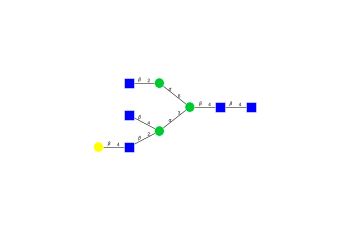

In [74]:
plot_glycan_utilities.plot_glycan(unspecified_substructure_vec[23], label=True)